<a href="https://colab.research.google.com/github/andre-sav/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# library import

import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
# read file in w/ informative features

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, index_col=False, names=['age', 'year', 'nodes', 'status'])

df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [19]:
# verify attributes

df.shape

(306, 4)

In [20]:
# check for missing values

df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [0]:
# change variable to binary

df['status'] = df['status'].apply(lambda x: 1 if x == 1 else 0)

In [22]:
# view

df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [24]:
# summary statistics 

df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
# binning

age_bins = pd.cut(df['age'], [20, 30, 40, 50, 60, 70, 80, 90])

node_bins = pd.cut(df['nodes'], 10)

In [39]:
# crosstab

ct = pd.crosstab(age_bins, df.status, normalize='columns')

ct

status,0,1
age,,
"(20, 30]",0.000000,0.013333
"(30, 40]",0.049383,0.160000
"(40, 50]",0.358025,0.284444
"(50, 60]",0.320988,0.297778
"(60, 70]",0.222222,0.200000
"(70, 80]",0.037037,0.044444
"(80, 90]",0.012346,0.000000


In [54]:
ct2 = pd.crosstab(node_bins, df.status, normalize='columns')

ct2

status,0,1
nodes,,
"(-0.052, 5.2]",0.567901,0.844444
"(5.2, 10.4]",0.148148,0.080000
"(10.4, 15.6]",0.135802,0.031111
"(15.6, 20.8]",0.049383,0.017778
"(20.8, 26.0]",0.074074,0.013333
"(26.0, 31.2]",0.000000,0.008889
"(31.2, 36.4]",0.012346,0.000000
"(41.6, 46.8]",0.000000,0.004444
"(46.8, 52.0]",0.012346,0.000000


In [46]:
ct3 = pd.crosstab(df.year, df.status, normalize='columns')

ct3

status,0,1
year,,
58,0.148148,0.106667
59,0.111111,0.080000
60,0.049383,0.106667
61,0.037037,0.102222
62,0.086420,0.071111
63,0.098765,0.097778
64,0.098765,0.102222
65,0.160494,0.066667
66,0.074074,0.097778


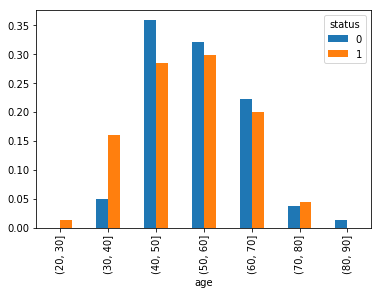

In [32]:
ct.plot.bar()

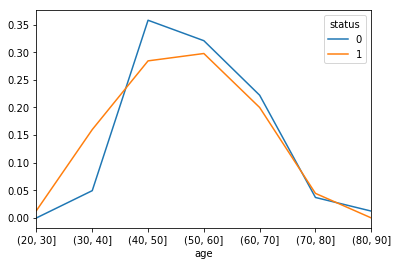

In [48]:
ct.plot()

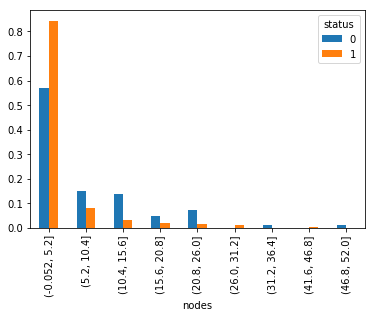

In [55]:
ct2.plot.bar()

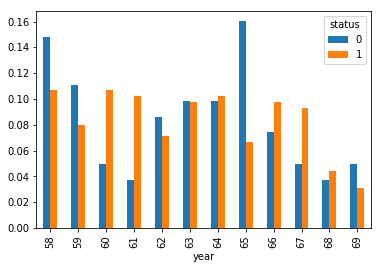

In [47]:
ct3.plot.bar()

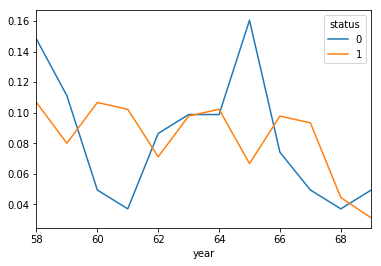

In [50]:
ct3.plot()

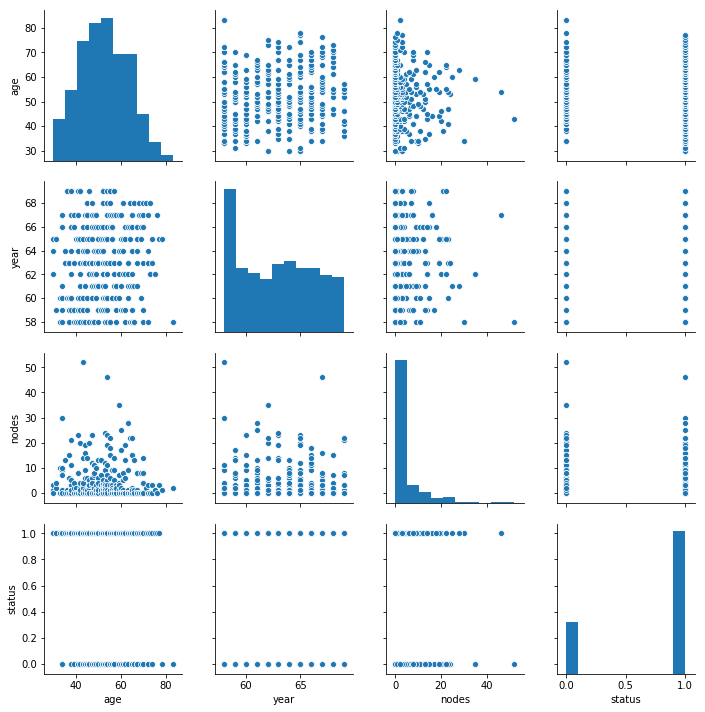

In [29]:
sns.pairplot(df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

One feature that has appears to have a positive relationship is certain years that the surgeries were done. 1960 and 1967 were most prominent.

One feature that appears to have a negative relationship with survival is age. The highest chances of survival are demonstrated by those patients that had procedures performed prior to middle age. Meaning that the older the patient the lower the chances of success. Another relationship is found between the amount of nodes and survival outcomes. Those with greater than 6+ nodes were increasingly unlikely to survive past 5 years after the operation.

It is difficult to ascertain the validity of any relationship between these features. The positive relationship during the aforementioned years could have been a statistical fluke, or attributable to features not present in the dataset. It is doubtful there is a relevant relationship between the positive and negative features in this case.